In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td


In [2]:
df_cases=pd.read_csv("cases.csv")
df_mortality=pd.read_csv("mortality.csv")
df_recovered=pd.read_csv("recovered.csv")
df_ontariodata=pd.read_csv("ontario_govt.csv")

In [3]:
df_cases.columns

Index(['case_id', 'provincial_case_id', 'age', 'sex', 'health_region',
       'province', 'country', 'date_report', 'report_week', 'travel_yn',
       'travel_history_country', 'locally_acquired', 'case_source',
       'additional_info', 'additional_source', 'method_note'],
      dtype='object')

In [4]:
df_mortality

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,2020-03-08,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,2020-03-11,https://www.nationalobserver.com/2020/03/17/ne...,Was being treated at Royal Victoria Regional H...,NaN
2,3,2,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
3,4,3,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
4,5,4,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,2020-03-16,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,15,NaN,Not Reported,Not Reported,Calgary,Alberta,Canada,2020-04-03,https://www.alberta.ca/coronavirus-info-for-al...,McKenzie Town Long Term Care,https://www.cbc.ca/news/canada/edmonton/hinsha...
219,220,16,NaN,Not Reported,Not Reported,Calgary,Alberta,Canada,2020-04-03,https://www.alberta.ca/coronavirus-info-for-al...,McKenzie Town Long Term Care,https://www.cbc.ca/news/canada/edmonton/hinsha...
220,221,17,NaN,Not Reported,Not Reported,Calgary,Alberta,Canada,2020-04-03,https://www.alberta.ca/coronavirus-info-for-al...,McKenzie Town Long Term Care,https://www.cbc.ca/news/canada/edmonton/hinsha...
221,222,18,NaN,20-29,Female,Edmonton,Alberta,Canada,2020-04-03,https://www.alberta.ca/coronavirus-info-for-al...,NaN,https://www.cbc.ca/news/canada/edmonton/hinsha...


In [5]:
df_ontario=df_cases.loc[(df_cases["province"]=="Ontario")]

In [6]:
df_ontario

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
1,2,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,Travel and Close Contact,NaN,0.0
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,0.0
9,10,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23,2020-02-23,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...,NaN,NaN,0.0
10,11,5,60-69,Female,Toronto,Ontario,Canada,2020-02-26,2020-02-23,1,Iran,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12799,12800,3682,30-39,Female,Chatham-Kent,Ontario,Canada,2020-04-03,2020-03-29,Not Reported,NaN,NaN,https://ckphu.com/current-situation-in-chatham...,NaN,NaN,NaN
12800,12801,3683,60-69,Female,Chatham-Kent,Ontario,Canada,2020-04-03,2020-03-29,Not Reported,NaN,NaN,https://ckphu.com/current-situation-in-chatham...,NaN,NaN,NaN
12977,12978,3684,Not Reported,Not Reported,Thunder Bay,Ontario,Canada,2020-04-03,2020-03-29,Not Reported,NaN,NaN,https://www.tbdhu.com/coronavirus#,NaN,NaN,NaN
12978,12979,3685,Not Reported,Not Reported,Thunder Bay,Ontario,Canada,2020-04-03,2020-03-29,Not Reported,NaN,NaN,https://www.tbdhu.com/coronavirus#,NaN,NaN,NaN


In [7]:
df_weekly=df_ontario.groupby(by="date_report").count()
df_weekly.reset_index()
df_weekly

,case_id,provincial_case_id,age,sex,health_region,province,country,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
date_report,,,,,,,,,,,,,,,
2020-01-25,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
2020-01-27,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1
2020-01-31,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
2020-02-23,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
2020-02-26,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1
2020-02-27,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1
2020-02-28,2,2,2,2,2,2,2,2,2,2,0,2,0,0,2
2020-02-29,3,3,3,3,3,3,3,3,3,2,1,3,1,0,3
2020-03-01,4,4,4,4,4,4,4,4,4,4,0,4,3,0,4


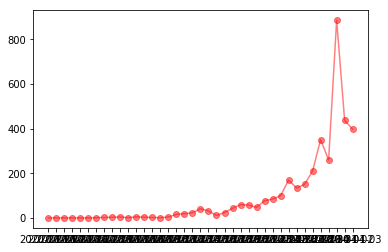

In [8]:
plt.plot(df_weekly.index,df_weekly["case_id"],c='r',marker='o',alpha=0.5)

plt.show()

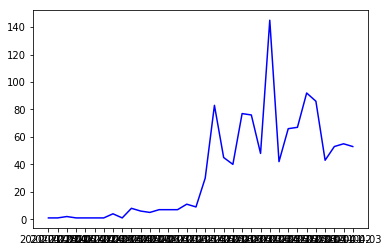

In [9]:
df_cases_bc=df_cases.loc[(df_cases["province"]=="BC")]
df_weekly_bc=df_cases_bc.groupby(by="date_report").count()
plt.plot(df_weekly_bc.index,df_weekly_bc["case_id"],c='b')

In [10]:
df_ontariodata

,_id,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1,2020-03-07T00:00:00,40s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2,2020-03-08T00:00:00,20s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,3,2020-03-10T00:00:00,40s,FEMALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,4,2020-03-11T00:00:00,50s,FEMALE,Neither,Resolved,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
4,5,5,2020-03-12T00:00:00,30s,FEMALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,3626,3626,2020-03-18T00:00:00,20s,MALE,Information pending,Resolved,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341
3626,3627,3627,2020-03-19T00:00:00,30s,MALE,Information pending,Resolved,Ottawa Public Health,100 Constellation Drive,Ottawa,K2G 6J8,www.ottawapublichealth.ca,45.345665,-75.763912
3627,3628,3628,2020-03-31T00:00:00,60s,MALE,Information pending,Not Resolved,Lambton Public Health,160 Exmouth Street,Point Edward,N7T 7Z6,www.lambtonhealth.on.ca,42.986416,-82.404808
3628,3629,3629,2020-03-31T00:00:00,90s,MALE,Information pending,Not Resolved,Lambton Public Health,160 Exmouth Street,Point Edward,N7T 7Z6,www.lambtonhealth.on.ca,42.986416,-82.404808


In [11]:
a=df_ontariodata.groupby(by="ACCURATE_EPISODE_DATE").count()

resolved_cases_df=df_ontariodata.loc[(df_ontariodata['OUTCOME1']=="Resolved")]
resolved_cases_df_weekly=resolved_cases_df.groupby("ACCURATE_EPISODE_DATE").count()

fatal_cases_df=df_ontariodata.loc[(df_ontariodata['OUTCOME1']=="Fatal")]
fatal_cases_df_weekly=fatal_cases_df.groupby("ACCURATE_EPISODE_DATE").count()

not_resolved_cases_df=df_ontariodata.loc[(df_ontariodata['OUTCOME1']=="Not Resolved")]
not_resolved_cases_df_weekly=not_resolved_cases_df.groupby("ACCURATE_EPISODE_DATE").count()

In [12]:

a

,_id,ROW_ID,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
ACCURATE_EPISODE_DATE,,,,,,,,,,,,,
2020-01-21T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-01-22T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-01-24T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-01-25T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-02-05T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-02-10T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-02-14T00:00:00,2,2,2,2,2,2,2,2,2,2,2,2,2
2020-02-15T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1
2020-02-16T00:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
a=a.reset_index()
a
new=a["ACCURATE_EPISODE_DATE"].str.split("T", n = 1, expand = True)

a["Date"]=new[0]



In [14]:
datetime.date.today(timedelta+4)

NameError: name 'timedelta' is not defined

In [15]:
y=[]
y=a["Date"]

y         
        


0     2020-01-21
1     2020-01-22
2     2020-01-24
3     2020-01-25
4     2020-02-05
5     2020-02-10
6     2020-02-14
7     2020-02-15
8     2020-02-16
9     2020-02-20
10    2020-02-21
11    2020-02-22
12    2020-02-23
13    2020-02-24
14    2020-02-25
15    2020-02-26
16    2020-02-27
17    2020-02-28
18    2020-02-29
19    2020-03-01
20    2020-03-02
21    2020-03-03
22    2020-03-04
23    2020-03-05
24    2020-03-06
25    2020-03-07
26    2020-03-08
27    2020-03-09
28    2020-03-10
29    2020-03-11
30    2020-03-12
31    2020-03-13
32    2020-03-14
33    2020-03-15
34    2020-03-16
35    2020-03-17
36    2020-03-18
37    2020-03-19
38    2020-03-20
39    2020-03-21
40    2020-03-22
41    2020-03-23
42    2020-03-24
43    2020-03-25
44    2020-03-26
45    2020-03-27
46    2020-03-28
47    2020-03-29
48    2020-03-30
49    2020-03-31
50    2020-04-01
51    2020-04-02
52    2020-04-03
Name: Date, dtype: object

In [16]:
week=td(days=7)



In [17]:
y

0     2020-01-21
1     2020-01-22
2     2020-01-24
3     2020-01-25
4     2020-02-05
5     2020-02-10
6     2020-02-14
7     2020-02-15
8     2020-02-16
9     2020-02-20
10    2020-02-21
11    2020-02-22
12    2020-02-23
13    2020-02-24
14    2020-02-25
15    2020-02-26
16    2020-02-27
17    2020-02-28
18    2020-02-29
19    2020-03-01
20    2020-03-02
21    2020-03-03
22    2020-03-04
23    2020-03-05
24    2020-03-06
25    2020-03-07
26    2020-03-08
27    2020-03-09
28    2020-03-10
29    2020-03-11
30    2020-03-12
31    2020-03-13
32    2020-03-14
33    2020-03-15
34    2020-03-16
35    2020-03-17
36    2020-03-18
37    2020-03-19
38    2020-03-20
39    2020-03-21
40    2020-03-22
41    2020-03-23
42    2020-03-24
43    2020-03-25
44    2020-03-26
45    2020-03-27
46    2020-03-28
47    2020-03-29
48    2020-03-30
49    2020-03-31
50    2020-04-01
51    2020-04-02
52    2020-04-03
Name: Date, dtype: object

KeyError: 'index'

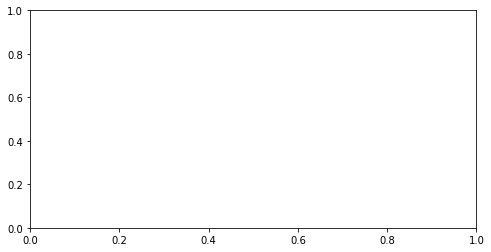

In [18]:

fig, (ax1) = plt.subplots(figsize=(8, 4))
ax1.plot(a["index"],a['_id'],marker='o',c='r')
plt.xlabel("Time")
plt.ylabel("Number of new cases")
plt.title("Number of new Covid-19 cases in Ontario (Data from Ontario.ca)")
"""plt.xticks(y,rotation=50)"""
plt.show()
